<a href="https://colab.research.google.com/github/daniel-usp/USP/blob/main/02%20-%20KNN/Prompt-KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Caso - Modelo de Classificação - Assinatura

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

#Banco de Dados Geral
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

#Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis = 1)



dados


,idade,fatura,temp_cli,linhas,renda,temp_rsd,internet,premiere,cancel
0,51,543,26,4,5320.0,7.3,1,0,0
1,36,482,16,2,5620.0,4.5,1,0,0
2,35,593,15,1,4860.0,4.8,0,0,0
3,40,1184,22,1,6590.0,6.2,1,0,0
4,52,634,30,1,6370.0,2.2,0,0,0
...,...,...,...,...,...,...,...,...,...
1994,31,625,15,4,10170.0,1.5,0,1,1
1995,37,4322,18,4,12230.0,4.6,1,1,1
1996,29,517,12,5,5590.0,6.7,1,0,1
1997,34,528,14,1,4760.0,6.9,1,0,1


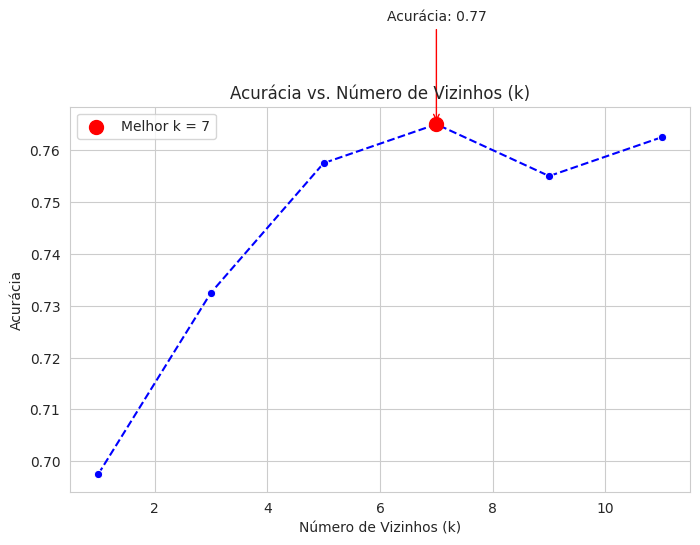

Melhor valor de k: 7
Acurácia obtida com k=7: 0.7650
Acurácia final no conjunto de teste com k=7: 0.7650


In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Banco de Dados Geral
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

#Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis = 1)


# 3. Separar os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Lista de valores de k a serem testados
k_values = [1, 3, 5, 7, 9, 11]

# Lista para armazenar a acurácia de cada valor de k
accuracies = []

# 5. Treinar e avaliar o modelo KNN para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 6. Identificar o melhor valor de k
best_index = np.argmax(accuracies)
best_k = k_values[best_index]
best_acc = accuracies[best_index]

# 7. Plotar o número de vizinhos (k) vs. acurácia com Seaborn
sns.set_style("whitegrid")  # estilo de fundo para o gráfico
plt.figure(figsize=(8, 5))

# Plot da linha pontilhada e dos pontos em azul
sns.lineplot(x=k_values, y=accuracies, marker='o', linestyle='--', color='blue')

# Destacar o melhor ponto em vermelho
plt.scatter(best_k, best_acc, color='red', s=100, zorder=10, label=f'Melhor k = {best_k}')

# Opcional: anotar o ponto ótimo no gráfico
plt.annotate(
    f'Acurácia: {best_acc:.2f}',
    xy=(best_k, best_acc),
    xytext=(best_k, best_acc + 0.02),
    arrowprops=dict(arrowstyle='->', color='red'),
    ha='center'
)

plt.title('Acurácia vs. Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# 8. Exibir o melhor k e a acurácia correspondente
print(f"Melhor valor de k: {best_k}")
print(f"Acurácia obtida com k={best_k}: {best_acc:.4f}")

# 9. (Opcional) Treinar o modelo final com o melhor k e avaliar no teste
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)
acuracia_final = accuracy_score(y_test, y_pred_final)

print(f"Acurácia final no conjunto de teste com k={best_k}: {acuracia_final:.4f}")



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Separar amostra em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de valores de K para testar
k_values = [1, 3, 5, 7, 9, 11, 15]

# Determinar o K ótimo
best_k = k_values[0]
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={score:.4f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nBest K: {best_k} with accuracy of {best_score:.4f}")

# Usar o K ótimo para determinar a taxa de acerto fora da amostra
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\nFinal accuracy with best K ({best_k}): {final_accuracy:.4f}")

#Chegou um cliente novo no com as seguintes características:
#idade = 35
#fatura = 600
#temp_cli	= 28
#linhas = 1
#renda = 5000
#temp_rsd = 8
#internet = 0
#premiere = 1
#Preveja o status dele com o KNN de 11 vizinhos


K=1, Accuracy=0.7067
K=3, Accuracy=0.7450
K=5, Accuracy=0.7700
K=7, Accuracy=0.7833
K=9, Accuracy=0.7900
K=11, Accuracy=0.7950
K=15, Accuracy=0.7900

Best K: 11 with accuracy of 0.7950

Final accuracy with best K (11): 0.7950


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Separar amostra em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de valores de K para testar
k_values = [1, 3, 5, 7, 9, 11, 15]

# Determinar o K ótimo
best_k = k_values[0]
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={score:.4f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nBest K: {best_k} with accuracy of {best_score:.4f}")

# Usar o K ótimo para determinar a taxa de acerto fora da amostra
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\nFinal accuracy with best K ({best_k}): {final_accuracy:.4f}")

# Chegou um cliente novo com as seguintes características:
novo_cliente = pd.DataFrame({
    'idade': [35],
    'fatura': [600],
    'temp_cli': [28],
    'linhas': [1],
    'renda': [5000],
    'temp_rsd': [8],
    'internet': [0],
    'premiere': [1]
})

# Normalizar os dados do novo cliente
novo_cliente_normalizado = scaler.transform(novo_cliente)

# Prever o status do novo cliente com o KNN de 11 vizinhos
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train, y_train)
previsao_novo_cliente = knn_11.predict(novo_cliente_normalizado)

print(f"\nStatus previsto para o novo cliente: {'cancel' if previsao_novo_cliente[0] else 'não cancel'}")

#Gere 10 clientes parecidos com o acima e preveja seu status de cancelamento


K=1, Accuracy=0.7067
K=3, Accuracy=0.7450
K=5, Accuracy=0.7700
K=7, Accuracy=0.7833
K=9, Accuracy=0.7900
K=11, Accuracy=0.7950
K=15, Accuracy=0.7900

Best K: 11 with accuracy of 0.7950

Final accuracy with best K (11): 0.7950

Status previsto para o novo cliente: não cancel


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Separar amostra em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de valores de K para testar
k_values = [1, 3, 5, 7, 9, 11, 15]

# Determinar o K ótimo
best_k = k_values[0]
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_k = k

# Usar o K ótimo para determinar a taxa de acerto fora da amostra
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

# Definir um cliente base
cliente_base = {
    'idade': 35,
    'fatura': 600,
    'temp_cli': 28,
    'linhas': 1,
    'renda': 5000,
    'temp_rsd': 8,
    'internet': 0,
    'premiere': 1
}

# Gerar 10 clientes similares com pequenas variações
np.random.seed(42)  # Para reprodutibilidade
clientes_novos = pd.DataFrame([{
    'idade': cliente_base['idade'] + np.random.randint(-5, 6),
    'fatura': cliente_base['fatura'] + np.random.randint(-100, 101),
    'temp_cli': cliente_base['temp_cli'] + np.random.randint(-3, 4),
    'linhas': cliente_base['linhas'],  # Supondo que o número de linhas não varia
    'renda': cliente_base['renda'] + np.random.randint(-1000, 1001),
    'temp_rsd': cliente_base['temp_rsd'] + np.random.randint(-2, 3),
    'internet': cliente_base['internet'],  # Supondo que o status de internet não varia
    'premiere': cliente_base['premiere']  # Supondo que o status de premiere não varia
} for _ in range(10)])

# Normalizar os dados dos novos clientes
clientes_novos_normalizados = scaler.transform(clientes_novos)

# Prever o status dos novos clientes com o KNN de 11 vizinhos
previsoes_novos_clientes = knn_best.predict(clientes_novos_normalizados)

# Exibir as previsões
clientes_novos['cancel'] = previsoes_novos_clientes
print(clientes_novos)


   idade  fatura  temp_cli  linhas  renda  temp_rsd  internet  premiere  \
0     36     679        29       1   5294         8         0         1   
1     37     688        29       1   5638         7         0         1   
2     32     574        27       1   4087        10         0         1   
3     33     603        27       1   5685        10         0         1   
4     31     587        28       1   5437         7         0         1   
5     34     660        28       1   5337        10         0         1   
6     38     548        27       1   5082         7         0         1   
7     32     607        31       1   5267         6         0         1   
8     32     550        31       1   4020         6         0         1   
9     36     517        28       1   4600         9         0         1   

   cancel  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  
